In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Charger le dataset
data = pd.read_csv(r'C:\Users\DELL\Desktop\Study\Aoudjit\MiniProjet2\data\data-Clustering Hiérarchique.csv')
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,Europe
1,22/10/2022,22,10,2022,5494.0,4.0,Austria,AT,AUT,8901064,Europe
2,21/10/2022,21,10,2022,7776.0,4.0,Austria,AT,AUT,8901064,Europe
3,20/10/2022,20,10,2022,8221.0,6.0,Austria,AT,AUT,8901064,Europe
4,19/10/2022,19,10,2022,10007.0,8.0,Austria,AT,AUT,8901064,Europe


In [6]:
# Filtrer les données pour l'Europe
data_europe = data[data['continentExp'] == 'Europe']

# Agréger les données par pays
data_grouped = data_europe.groupby('countriesAndTerritories').agg({
    'cases': 'sum',
    'deaths': 'sum',
    'popData2020': 'mean'
}).reset_index()

data_grouped.head()

,countriesAndTerritories,cases,deaths,popData2020
0,Austria,5402162.0,20899.0,8901064.0
1,Belgium,4607296.0,32883.0,11522440.0
2,Bulgaria,1275481.0,37790.0,6951482.0
3,Croatia,1244692.0,17085.0,4058165.0
4,Cyprus,596297.0,1191.0,888005.0


In [11]:
# Calculer les cas et décès par million d'habitants
data_grouped['cases_per_million'] = (data_grouped['cases'] / data_grouped['popData2020']) * 1_000_000
data_grouped['deaths_per_million'] = (data_grouped['deaths'] / data_grouped['popData2020']) * 1_000_000

# Normalisation des variables pour le clustering
clustering_data = data_grouped[['cases_per_million', 'deaths_per_million']]
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)
clustering_data_normalized

array([[ 1.41410681, -0.17729226],
       [-0.0410401 ,  0.25790972],
       [-1.56163728,  2.47944659],
       [-0.69561169,  1.42458944],
       [ 1.86802759, -1.04331819],
       [-0.12188475,  1.14321528],
       [ 1.03472478, -1.12243854],
       [ 0.35488588, -0.42412951],
       [-1.15269041, -1.19956727],
       [ 0.9709793 , -0.19714476],
       [ 0.13076312, -0.61706393],
       [ 0.51583611,  0.49748937],
       [-1.31060625,  2.02406423],
       [ 1.12724776, -1.69389101],
       [-0.48649895, -0.80910073],
       [-0.09856845,  0.37945498],
       [ 0.6458654 ,  0.52840014],
       [ 0.87578292, -0.28774411],
       [ 0.33311407,  0.69268978],
       [ 0.52780616, -0.62527729],
       [-1.27716088, -0.84627529],
       [ 0.57834591, -1.07179313],
       [-0.93431625, -1.52605249],
       [-1.70514696,  0.47829092],
       [ 0.91294073, -0.0973312 ],
       [-1.67069166,  0.79278065],
       [ 0.41375245,  1.03577872],
       [ 1.26728561,  0.62476568],
       [-0.83706514,

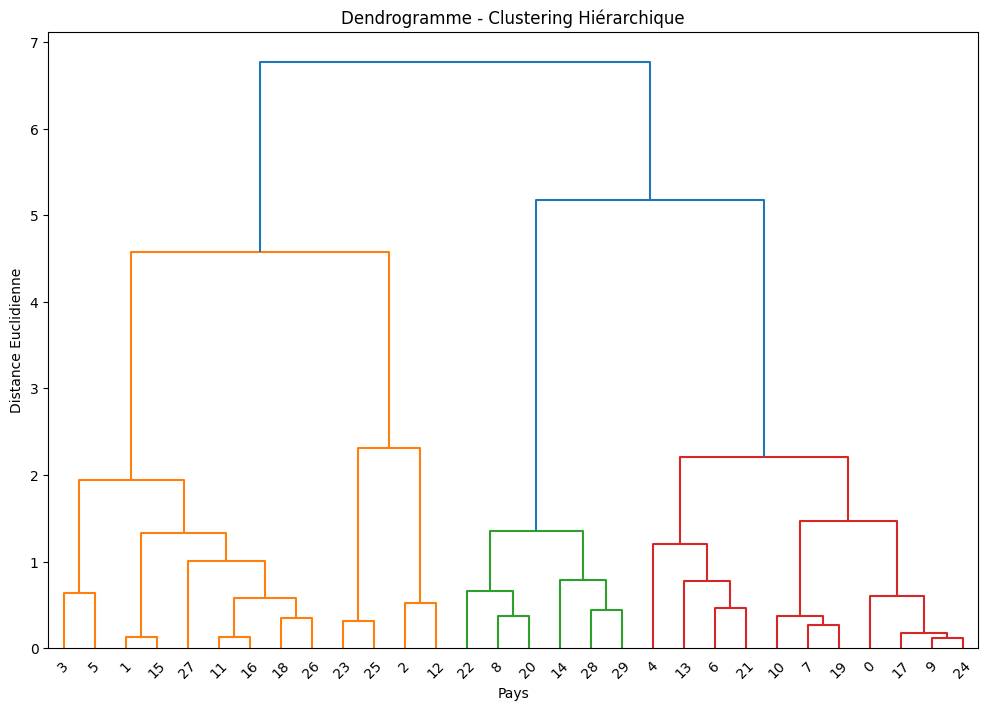

In [12]:
# Construction du dendrogramme
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(clustering_data_normalized, method='ward'))
plt.title("Dendrogramme - Clustering Hiérarchique")
plt.xlabel("Pays")
plt.ylabel("Distance Euclidienne")
plt.show()


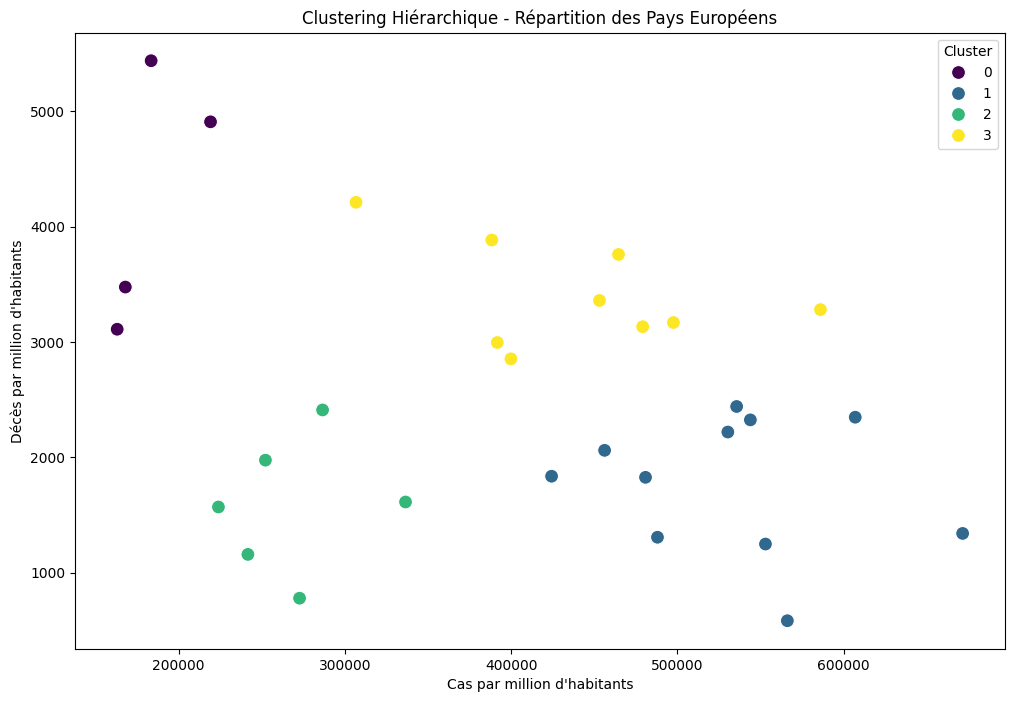

In [14]:
# Appliquer le clustering hiérarchique
num_clusters = 4
hc = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
data_grouped['Cluster'] = hc.fit_predict(clustering_data_normalized)


# Visualiser les clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='cases_per_million', 
    y='deaths_per_million', 
    hue='Cluster', 
    palette='viridis', 
    data=data_grouped, 
    s=100
)
plt.title("Clustering Hiérarchique - Répartition des Pays Européens")
plt.xlabel("Cas par million d'habitants")
plt.ylabel("Décès par million d'habitants")
plt.legend(title="Cluster")
plt.show()

In [16]:

# Sauvegarder les résultats
output_path = r'C:\Users\DELL\Desktop\Study\Aoudjit\MiniProjet2/clustering_hierarchique_results.csv'
data_grouped.to_csv(output_path, index=False)
print(f"Les résultats ont été sauvegardés dans {output_path}.")


Les résultats ont été sauvegardés dans C:\Users\DELL\Desktop\Study\Aoudjit\MiniProjet2/clustering_hierarchique_results.csv.
